![](../images/logos.jpg "MiCMOR, KIT Campus Alpin")

**[MiCMOR](https://micmor.kit.edu) [SummerSchool "Environmental Data Science: From Data Exploration to Deep Learning"](https://micmor.kit.edu/sites/default/files/MICMoR%20Summer%20School%202019%20Flyer.pdf)**  
IMK-IFU KIT Campus Alpin, Sept. 4 - 13 2019, Garmisch-Partenkirchen, Germany.

---

# Working with gridded data: xarray

![xarray](http://xarray.pydata.org/en/stable/_static/dataset-diagram-logo.png)



[Xarray](http://xarray.pydata.org/en/stable/) is one of the great packages to know if you work with any gridded data. 

To cite from their homepage:

>Xarray introduces labels in the form of dimensions, coordinates and attributes on top of raw [NumPy](http://www.numpy.org/)-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. The package includes a large and growing library of domain-agnostic functions for advanced analytics and visualization with these data structures.
>
>Xarray was inspired by and borrows heavily from [pandas](http://pandas.pydata.org/), the popular data analysis package focused on labelled tabular data. It is particularly tailored to working with [netCDF](http://www.unidata.ucar.edu/software/netcdf) files, which were the source of xarray’s data model, and integrates tightly with [dask](http://dask.org/) for parallel computing.

This is great since we know that all things numpy are fast, pandas at the center of Python Data Science anyways since it's so friendly, powerful and flexible. Furthermore, netCDF is a really good data format to use since it encapsulates not only potentially multiple variables, but also meta-data and units and is very widely used in sciences and in the industry. And finally, dask is really great if you have to work with large and potentially distributed data. We will have a quick look at dask later in the course. For now it's good to know that xarray will automatically utilize it if it's installed.

Let's get a quick overview:

## Basics

Xarray has two core data structures, which build upon and extend the core strengths of NumPy and pandas. Both are fundamentally N-dimensional:

- **DataArray** is a labeled, N-dimensional array. It is an N-D generalization of a pandas.Series.
- **Dataset** is a multi-dimensional, in-memory array database. It is a dict-like container of DataArray objects aligned along any number of shared dimensions, and serves a similar purpose in xarray to the pandas.DataFrame.

The value of attaching labels to numpy’s numpy.ndarray may be fairly obvious, but the dataset may need more motivation. The dataset data model is borrowed from the netCDF file format, which also provides xarray with a natural and portable serialization format. NetCDF is very popular in the geosciences, and there are existing libraries for reading and writing netCDF in many programming languages, including Python.

Let's start with some [very basic examples](http://xarray.pydata.org/en/stable/quick-overview.html) to see it in action. We then proceed to a more realsistic example.

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import xarray as xr
import numpy as np

In [7]:
# we define a dataarray with 2 dimensions (named x and y) and the coordinate labels 10 and 20 for the x dimensions
data = xr.DataArray(np.random.randn(2, 3), dims=('x', 'y'), coords={'x': [10, 20]})
data

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.084263,  0.597501, -0.617438],
       [ 0.114473,  0.204895, -1.968643]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [9]:
# like in pandas, values is a numpy array that you can modify in-place
data.values

array([[ 0.0842632 ,  0.59750126, -0.61743769],
       [ 0.11447282,  0.20489546, -1.96864253]])

In [10]:
data.dims

('x', 'y')

In [11]:
data.coords

Coordinates:
  * x        (x) int64 10 20

You can store additional meta-data in the `attrs` dictionary:

In [12]:
data.attrs

OrderedDict()

### Indexing

Like in numpy and pandas, indexing can get pretty complex but is really powerful. This only shows you the very basics. You probably want to read up on it [here](http://xarray.pydata.org/en/stable/indexing.html#indexing).

However, in xarray, there are 4 ways of doing it:

In [14]:
# positional and by integer label, like numpy
data[[0, 1]]

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.084263,  0.597501, -0.617438],
       [ 0.114473,  0.204895, -1.968643]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [15]:
# positional and by coordinate label, like pandas
data.loc[10:20]

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.084263,  0.597501, -0.617438],
       [ 0.114473,  0.204895, -1.968643]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [16]:
# by dimension name and integer label
data.isel(x=slice(2))

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.084263,  0.597501, -0.617438],
       [ 0.114473,  0.204895, -1.968643]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [17]:
# by dimension name and coordinate label
data.sel(x=[10, 20])

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.084263,  0.597501, -0.617438],
       [ 0.114473,  0.204895, -1.968643]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

### Attributes/ Meta-data

It’s often a good idea to set metadata attributes. A useful choice is to set data.attrs['long_name'] and data.attrs['units'] since xarray will use these, if present, to automatically label your plots. These special names were chosen following the [NetCDF Climate and Forecast (CF) Metadata Conventions](http://cfconventions.org/cf-conventions/cf-conventions.html). `attrs` is just a Python dictionary, so you can assign anything you wish.

In [18]:
# assigning attributes to dataarray
data.attrs['long_name'] = 'random velocity'
data.attrs['units'] = 'metres/sec'
data.attrs['description'] = 'A random variable created as an example.'
data.attrs['random_attribute'] = 123
data.attrs

OrderedDict([('long_name', 'random velocity'),
             ('units', 'metres/sec'),
             ('description', 'A random variable created as an example.'),
             ('random_attribute', 123)])

### Computation

Another great feature is that dataarrays work similar to numpy ndarrays. Observe:

In [19]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[10.084263, 10.597501,  9.382562],
       [10.114473, 10.204895,  8.031357]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [20]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.084164,  0.562578, -0.578948],
       [ 0.114223,  0.203465, -0.921898]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [21]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[ 0.084263,  0.114473],
       [ 0.597501,  0.204895],
       [-0.617438, -1.968643]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [22]:
data.sum()

<xarray.DataArray ()>
array(-1.584947)

However, aggregation operations can use dimension names instead of axis numbers:

In [23]:
# take the mean over the x-dimension
data.mean(dim='x')

<xarray.DataArray (y: 3)>
array([ 0.099368,  0.401198, -1.29304 ])
Dimensions without coordinates: y

### GroupBy

Like pandas, xarray supports `groupby` operations (see: [here](http://xarray.pydata.org/en/stable/groupby.html#groupby)).

In [25]:
labels = xr.DataArray(['E', 'F', 'E'], [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [26]:
# the mean of y over the labels
data.groupby(labels).mean('y')

<xarray.DataArray (x: 2, labels: 2)>
array([[-0.266587,  0.597501],
       [-0.927085,  0.204895]])
Coordinates:
  * x        (x) int64 10 20
  * labels   (labels) object 'E' 'F'

### Plotting

You can directly plot on xarray objects (like with pandas).

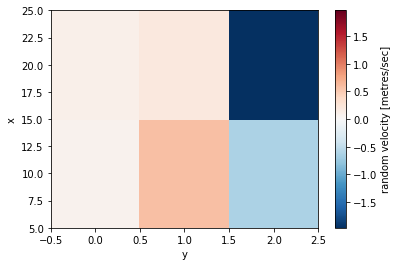

In [28]:
data.plot();

## Datasets

**xr.Dataset** is a dict-like container of aligned DataArray objects. You can think of it as a multi-dimensional generalization of the **pd.DataFrame**:

In [30]:
ds = xr.Dataset({'foo': data, 'bar': ('x', [1, 2]), 'baz': np.pi})
ds

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 0.08426 0.5975 -0.6174 0.1145 0.2049 -1.969
    bar      (x) int64 1 2
    baz      float64 3.142

You can access the individual variables/ dataarrays of a dataset like with a dictionary:

In [31]:
ds['foo']

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 0.084263,  0.597501, -0.617438],
       [ 0.114473,  0.204895, -1.968643]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [32]:
ds.foo

<xarray.DataArray 'foo' (x: 2, y: 3)>
array([[ 0.084263,  0.597501, -0.617438],
       [ 0.114473,  0.204895, -1.968643]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

### Read/ write netCDF files

NetCDF is the recommended file format for xarray objects. Users from the geosciences will recognize that the Dataset data model looks very similar to a netCDF file (which, in fact, inspired it).
You can directly read and write xarray objects to disk using `to_netcdf()`, `open_dataset()` and `open_dataarray()`.

Later, we will also use another vaariant. As it is common for datasets to be distributed across multiple files (commonly one file per timestep) xarray supports this use-case by providing the `open_mfdataset()` and the `save_mfdataset()` methods. For more, see [Reading and writing files](http://xarray.pydata.org/en/stable/io.html#io) or later notebooks in the course.

In [33]:
ds.to_netcdf('example.nc')

In [34]:
ds2 = xr.open_dataset('example.nc')
ds2

<xarray.Dataset>
Dimensions:  (x: 2, y: 3)
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Data variables:
    foo      (x, y) float64 ...
    bar      (x) int64 ...
    baz      float64 ...

In [36]:
# cleanup
! rm example.nc

rm: cannot remove 'example.nc': No such file or directory


## Open multiple files as one

The following example is from: https://rabernat.github.io/research_computing_2018/xarray-tips-and-tricks.html

One thing we love about xarray is the `open_mfdataset()` function, which combines many netCDF files into a single xarray Dataset.
But what if the files are stored on a remote server and accessed over OpenDAP. An example can be found in NOAA's NCEP Reanalysis catalog.

https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/ncep.reanalysis/surface/catalog.html

The dataset is split into different files for each variable and year. For example, a single file for surface air temperature looks like:

http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1948.nc

In [37]:
# dataset split into different files
base_url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995'

files = [f'{base_url}.{year}.nc' for year in range(1948, 2019)]
files

['http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1948.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1949.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1950.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1951.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1952.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1953.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1954.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1955.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1956.nc',
 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis/surface/air.sig995.1957.nc',
 'http://w

However, we can open them as if they were a single file!

In [41]:
ds = xr.open_mfdataset(files[-10:])
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 14608)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * time     (time) datetime64[ns] 2009-01-01 ... 2018-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 dask.array<shape=(14608, 73, 144), chunksize=(1460, 73, 144)>
Attributes:
    Conventions:                     COARDS
    title:                           4x daily NMC reanalysis (2009)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 2009/01 by Hoop (netCDF2.3)\nCon...
    References:                      http://www.esrl.noaa.gov/psd/data/gridde...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    DODS_EXTRA.Unlimited_Dimension:  time

We now can operate on them (like selecting a region), too.

In [42]:
dseu = ds.sel(lat=slice(60,20), lon=slice(0,30))
ts = dseu.mean(dim=['lat','lon'])
ts

<xarray.Dataset>
Dimensions:  (time: 14608)
Coordinates:
  * time     (time) datetime64[ns] 2009-01-01 ... 2018-12-31T18:00:00
Data variables:
    air      (time) float32 dask.array<shape=(14608,), chunksize=(1460,)>

KeyboardInterrupt: 

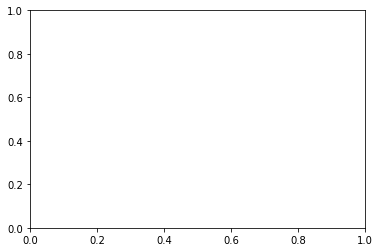

In [45]:
ts.air.plot();

# Some actual Analysis: SST example

Example from: https://rabernat.github.io/research_computing_2018/intermediate-xarray.html  

In [46]:
# we want to use interactive plotting with hvplot
import hvplot.xarray

In [47]:
# alternative download the file first
! wget http://ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc

--2019-09-03 13:11:19--  http://ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc
Resolving ldeo.columbia.edu (ldeo.columbia.edu)... 129.236.10.30
Connecting to ldeo.columbia.edu (ldeo.columbia.edu)|129.236.10.30|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://www.ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc [following]
--2019-09-03 13:11:19--  http://www.ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc
Resolving www.ldeo.columbia.edu (www.ldeo.columbia.edu)... 129.236.14.15
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc [following]
--2019-09-03 13:11:20--  https://www.ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc
Connecting to www.ldeo.columbia.edu (www.ldeo.columbia.edu)|129.236.14.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43852246 (42M) [

In [53]:
#ds = xr.open_dataset('http://ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc')
ds = xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

As you can see the longitudes are organized from 0 - 360 (US style). We can change this easily:

In [54]:
# convert to -180/180
#ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
#ds = ds.sortby(ds.lon)
#
#sst = ds.sst
#sst

In [55]:
# convert to -180/180 
sst.coords['lon'] = (sst.coords['lon'] + 180) % 360 - 180
sst = sst.sortby(sst.lon)

We can also operate over the dimensions. In the following cell we group by months, and compute the mean over the time dimensions creating a monthly climatology. The we compute the anomaly of each month in the original time-series to this climatology.

In [58]:
sst_clim = sst.groupby('time.month').mean(dim='time')
sst_anom = sst.groupby('time.month') - sst_clim

/opt/conda/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


If we `groupby` in hvplot we get a slider where we can interact with the plot with.

In [59]:
sst_anom.hvplot('lon','lat',groupby='time', width=600, cmap='RdBu', clim=(-2,2))

:DynamicMap   [time]
   :Image   [lon,lat]   (sst)

We can also slect a point in the dataset. You do not have to specify the excat matching grid cell - use `nearest` instead...

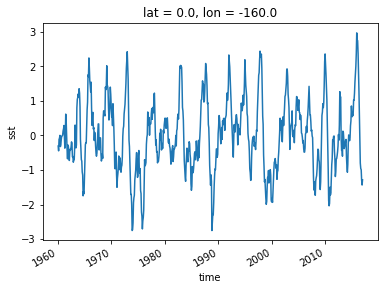

In [60]:
sst_ref = sst_anom.sel(lon=-160, lat=0, method='nearest')
sst_ref.plot();

In [66]:
def covariance(x, y, dims=None):
    return xr.dot(x - x.mean(dims), y - y.mean(dims), dims=dims) / x.count(dims)

def corrrelation(x, y, dims=None):
    return covariance(x, y, dims) / (x.std(dims) * y.std(dims))

We can then do some computations between the point and the array:

/opt/conda/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


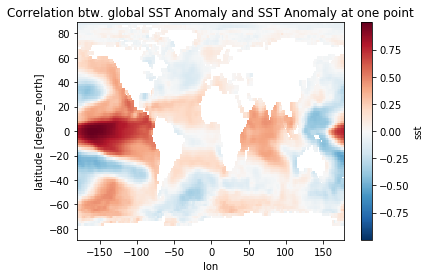

In [67]:
sst_cor = corrrelation(sst_anom, sst_ref, dims='time')
pc = sst_cor.plot()
pc.axes.set_title('Correlation btw. global SST Anomaly and SST Anomaly at one point');